In [96]:
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!git clone https://github.com/jjguglielmi/Neural-Architecture-Search-without-Training.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'Neural-Architecture-Search-without-Training'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [103]:
def func(string):
  count = ''
  for i in range(0,3):
    if(i!=0): count = count + ' '
    tot = string.split('+')[i].count('skip')
    count = count + str(tot)
  return count  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

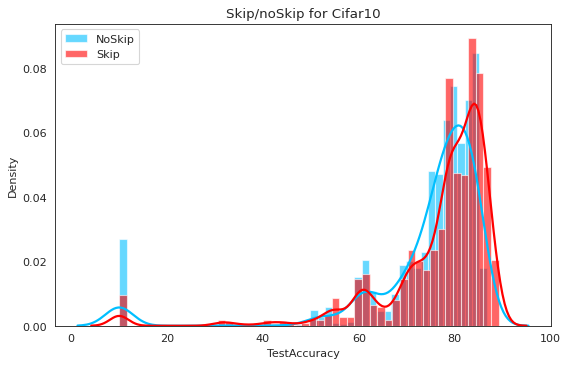

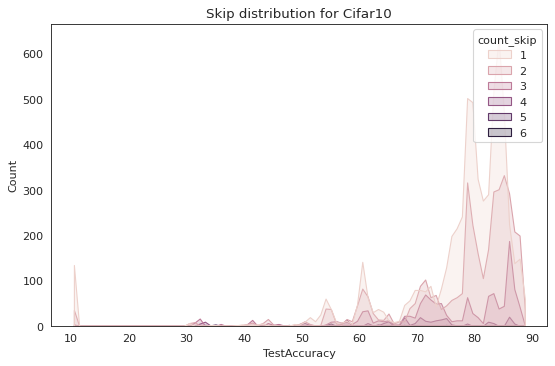

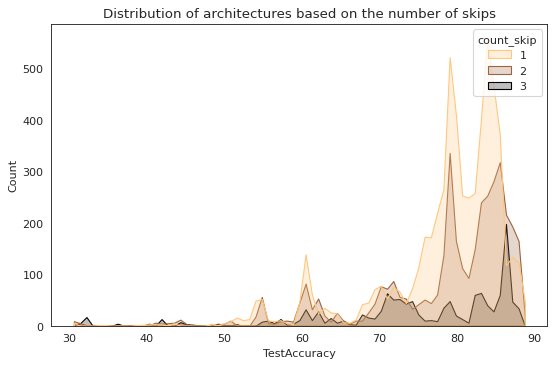

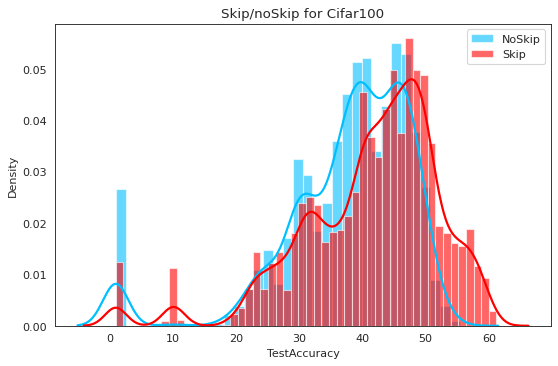

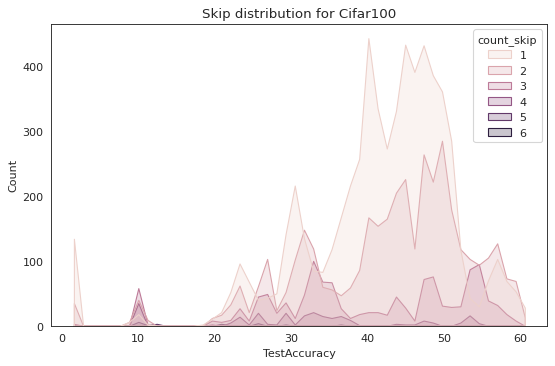

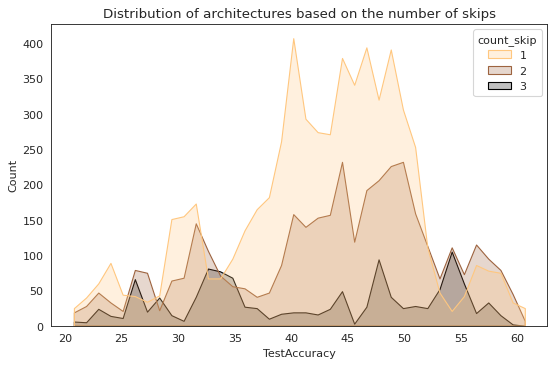

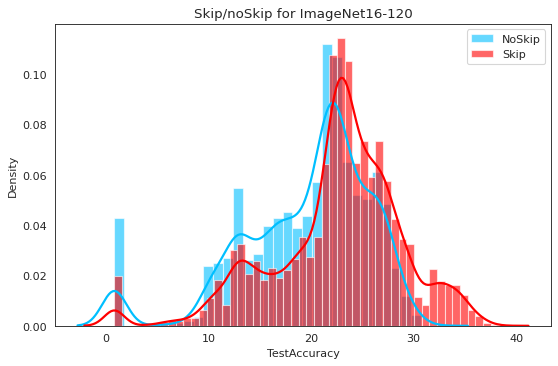

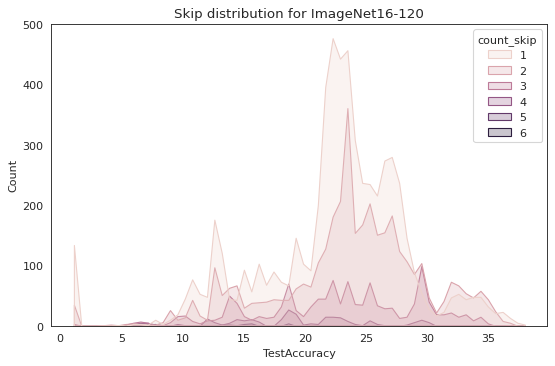

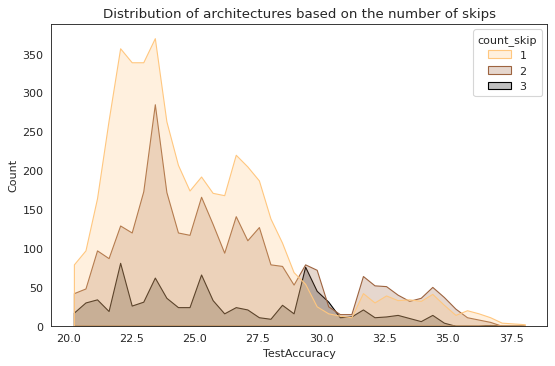

In [108]:
header=['Dataset', 'Arch', 'LogDet', 'TestAccuracy', 'Time']
csvs = ['/content/Neural-Architecture-Search-without-Training/out_C10_15k.csv', 
        '/content/Neural-Architecture-Search-without-Training/out_cifar100_15k.csv', 
        '/content/Neural-Architecture-Search-without-Training/out_IN_15k.csv']
datasets = ['Cifar10', 'Cifar100', 'ImageNet16-120']

for csv, ds in zip(csvs, datasets):
  df= pd.read_csv(csv, header=None, names=header)
  countdf = df['Arch'].str.count('skip')
  df['count_skip'] = countdf
  df=df.astype({'count_skip': int, 'TestAccuracy': float})

  sns.set_style("white")
  x0 = df.loc[df['count_skip']==0, 'TestAccuracy']
  xS= df.loc[df['count_skip']>0, 'TestAccuracy']

  kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
  plt.figure(figsize=(8,5), dpi= 80)
  sns.distplot(x0, color='deepskyblue', label='NoSkip', **kwargs)
  sns.distplot(xS, color='red', label='Skip', **kwargs)
  plt.legend()
  plt.title(f'Skip/noSkip for {ds}')
  plt.savefig(f'histSkip_noSkip{ds}.png')

  skip_df = df[df['Arch'].str.contains('skip')]
  skip_count = skip_df['Arch'].str.count('skip')
  skip_df['count_skip'] = skip_count
  acc_count= skip_df[['TestAccuracy', 'count_skip']].copy()
  acc_no_outliers = acc_count.loc[acc_count['TestAccuracy']>20, ['TestAccuracy', 'count_skip']]
  acc_no_outliers.groupby("count_skip").agg(["mean", "std"]).to_csv(f'comparisonMeanSTDSkips{ds}.csv')

  plt.figure(figsize=(8,5), dpi= 80)
  sns.histplot(acc_count, x='TestAccuracy', hue='count_skip', element='poly')
  plt.title(f'Skip distribution for {ds}')
  plt.savefig(f'histSkip{ds}.png')
  df_skips= acc_count.loc[(acc_count['count_skip']<=3) & (acc_count['TestAccuracy']>20), ['TestAccuracy', 'count_skip']]

  df_skips
  plt.figure(figsize=(8,5), dpi= 80)
  plt.title('Distribution of architectures based on the number of skips')
  sns.histplot(df_skips, x='TestAccuracy', hue='count_skip', element='poly', palette = 'copper_r')
  plt.savefig(f'histHighAcc{ds}.png')
  df_skips.groupby("count_skip").agg(["mean", "std"]).to_csv(f'comparisonMeanSTDSkips{ds}.csv') ## table mean/std of arch with 1/2/3 skips without outliers (acc>20)
  tot= skip_df.loc[(skip_df['count_skip']<=3) & (acc_count['TestAccuracy']>20), ['Arch', 'TestAccuracy', 'count_skip']]

  totPosSkip = tot.copy()
  totPosSkip['pos_countSkip'] = totPosSkip['Arch'].apply(lambda x: str(func(x)))
  new = totPosSkip.filter(['TestAccuracy', 'count_skip', 'pos_countSkip'])
  sorted = new.sort_values('TestAccuracy', ascending=False)
  ##sorted.head(5).to_latex()
  sorted.head(10).to_csv(f'first10SortedArchwithSkipPos-{ds}.csv')